In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#adding ntlk for NLP training
import nltk

In [14]:
#please install ghostscript on your environment
#https://pypi.org/project/ghostscript/
#for pip users:

#pip install ghostscript

#for conda users:
#conda install -c conda-forge ghostscript

# Reading in the data

In [15]:
df = pd.read_parquet('data/edmonton_cleaned.parquet', engine='auto')
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",uwPhE21CZLlp1kkSMPvvYw,5OnQqP3q2_9auNdDKpLdsw,3,0,0,0,So much to like about this place--the beautifu...,2012-11-06 23:35:15
1,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",bAy8ROEYO_3aTBhW5LoR4g,7qFH1RkPivVRcwxLwhyixg,4,2,0,1,I'm not a coffee connoisseur so I'm not review...,2013-05-28 23:16:30
2,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",zPDHE7TrXs7EJT06qD8yTA,FLeyjgc05C2V6QI9nVQ48Q,4,0,0,0,"I really loved it here, makes me wish I lived ...",2013-09-04 19:49:33
3,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",84niL3fvJMlFBE2hd2qOVQ,R-c5M0iJkMxxTxIqTQQZ8w,2,1,0,0,The kids who work at Roast are friendly. They...,2013-07-14 21:38:06
4,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",pLnTjS90gUlsq2tAjI9prA,G3h8pIclwUbuu3itJqF7ug,4,7,0,4,"With a Toast to Roast, I say welcome to the E-...",2012-09-11 23:54:24


# Exploratory Data analysis

In [16]:
df.shape
#there are 67,148 reviews in the cleaned data.

(67148, 22)

In [17]:
#checking how many reviews belong to what stars, note: stars_y is score given by customer
counting_stars = df['stars_y'].value_counts().sort_index()
counting_stars

1     6822
2     6164
3    10011
4    21180
5    22971
Name: stars_y, dtype: int64

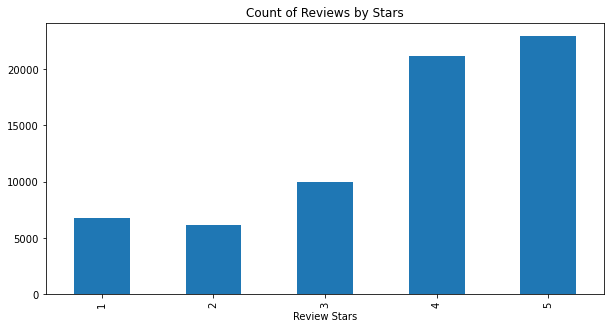

In [18]:
plot = counting_stars.plot(kind='bar',
                    title='Count of Reviews by Stars', 
                    figsize=(10,5))
plot.set_xlabel('Review Stars')

plt.show()
#the data is skewed on the left skewed

In [19]:
sampleneutral = df['text'][15]
sampleneutral
#neutral review

"I was surprised to hear that this place had closed. Too cool for Edmonton. It's also a difficult balance for a cafe between making a place feel cosy enough to spend hours there, and having people actually buy 1 drink and spending hours there."

In [20]:
samplepos = df['text'][16]
samplepos
#positive review

"The decor is fantastic and the staff are friendly. The coffee profile is a little dark for my liking, and the music is 50% terrible, but the atmosphere is otherwise a joy. I've enjoyed some nice events there as well."

In [21]:
sampleneg = df[df['stars_y']==1]['text'][74]
sampleneg
#sample neg

"I've been going to this bakery for years. The service and availability of products has gotten much worse over the past year or so. The owners seem to not want to be there and treat you accordingly. I won't be going back."

In [22]:
tokens = nltk.word_tokenize(samplepos)
print(tokens)
#punctuations are not important,also notice that word "I've" are split to two tokens.

['The', 'decor', 'is', 'fantastic', 'and', 'the', 'staff', 'are', 'friendly', '.', 'The', 'coffee', 'profile', 'is', 'a', 'little', 'dark', 'for', 'my', 'liking', ',', 'and', 'the', 'music', 'is', '50', '%', 'terrible', ',', 'but', 'the', 'atmosphere', 'is', 'otherwise', 'a', 'joy', '.', 'I', "'ve", 'enjoyed', 'some', 'nice', 'events', 'there', 'as', 'well', '.']


In [23]:
tagged = nltk.pos_tag(tokens)
tagged[:20]
#we have each token plus its part of speech, see abbrevations key above.

[('The', 'DT'),
 ('decor', 'NN'),
 ('is', 'VBZ'),
 ('fantastic', 'JJ'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('staff', 'NN'),
 ('are', 'VBP'),
 ('friendly', 'RB'),
 ('.', '.'),
 ('The', 'DT'),
 ('coffee', 'NN'),
 ('profile', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('dark', 'NN'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('liking', 'NN')]

In [29]:
#each tagged tokens are turns into entity variables.
entities = nltk.chunk.ne_chunk(tagged)
print(entities.__repr__())

Tree('S', [('The', 'DT'), ('decor', 'NN'), ('is', 'VBZ'), ('fantastic', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('staff', 'NN'), ('are', 'VBP'), ('friendly', 'RB'), ('.', '.'), ('The', 'DT'), ('coffee', 'NN'), ('profile', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('little', 'JJ'), ('dark', 'NN'), ('for', 'IN'), ('my', 'PRP$'), ('liking', 'NN'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('music', 'NN'), ('is', 'VBZ'), ('50', 'CD'), ('%', 'NN'), ('terrible', 'JJ'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('atmosphere', 'NN'), ('is', 'VBZ'), ('otherwise', 'RB'), ('a', 'DT'), ('joy', 'NN'), ('.', '.'), ('I', 'PRP'), ("'ve", 'VBP'), ('enjoyed', 'VBN'), ('some', 'DT'), ('nice', 'JJ'), ('events', 'NNS'), ('there', 'RB'), ('as', 'RB'), ('well', 'RB'), ('.', '.')])
